# Proyek Analisis Data: Bike Sharing Dataset (Day)
- **Nama:** Fauzan Dwi Asyiraf
- **Email:** m004d4ky2598@bangkit.academy
- **ID Dicoding:** fauzan_dwi_asyiraf

## Menentukan Pertanyaan Bisnis

- Bagaimana performa persewaan sepeda di tahun 2011 dan 2012?
- Bagaimana pengaruh perbedaan musim terhadap jumlah sepeda yang disewa?
- Seperti apa hubungan temperatur udara dengan jumlah persewaan sepeda dalam satu hari?

## Import Semua Packages/Library yang Digunakan

Melakukan import packages agar dapat digunakan ketika melakukan analisis data. Disini packages yang akan digunakan ada pandas untuk mengolah data dan melakukan exploratory, lalu ada matplotlib dan seaborn untuk membuat visualisasi data dan memudahkan dalam proses explanatory

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Proses mengumpulkan data dengan membaca file CSV yang telah disediakan sebelum melakukan proses analisis

In [22]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [23]:
#Mengecek data tiap variabel
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [24]:
#Mengecek missing value pada data
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [25]:
#Mengecek duplikasi pada data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
#Melihat statistika deskriptif dari data
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [27]:
#Mengganti tipe data pada variabel dteday yang semuala object menjadi datetime
day_datetime_columns = ["dteday"]
for column in day_datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore cnt in 2011(0) and 2012(1)

In [28]:
#Mengecek statistika deskriptif dari semua variabel
day_df.describe(include="all")

<ipython-input-28-6cd5e3833c34>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [29]:
#Melihat jumlah sepeda disewa pada tiap tahunnya
day_df["yr"] = day_df["yr"].apply(lambda x: "2011" if x == 0 else "2012")
day_df.groupby(by="yr").cnt.sum().sort_values(ascending=False)

yr
2012    2049576
2011    1243103
Name: cnt, dtype: int64

### Explore season with springer(1), summer(2), fall(3), winter(4)

In [30]:
#Melihat jumlah sepeda disewa pada tiap musim
day_df["season"] = day_df["season"].apply(lambda x: "springer" if x == 1 else("summer" if x==2 else("fall" if x==3 else "winter")))
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
fall        1061129
summer       918589
winter       841613
springer     471348
Name: cnt, dtype: int64

### Explore temp vs cnt

Membandingkan statistika deskriptif pada variabel temp dan cnt

In [31]:
day_df["temp"].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [32]:
day_df["cnt"].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa persewaan sepeda di tahun 2011 dan 2012?

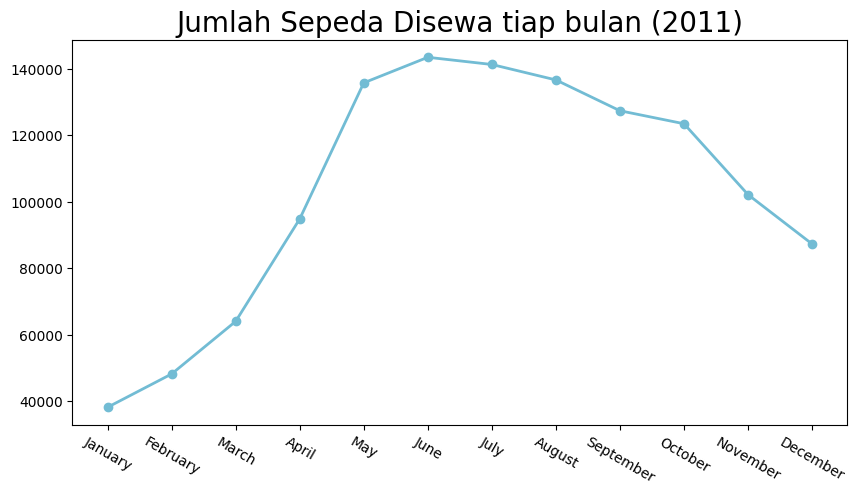

In [33]:
Y2011_df = day_df[day_df.yr=="2011"] #mengambil data tahun 2011

monthly_cnt_df = Y2011_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_cnt_df.index = monthly_cnt_df.index.strftime('%B') #mengubah format order date menjadi nama bulan

monthly_cnt_df = monthly_cnt_df.reset_index()
monthly_cnt_df.rename(columns={
    "cnt": "Jumlah Sepeda Disewa"
}, inplace=True)

plt.figure(figsize=(10, 5))

plt.plot(
    monthly_cnt_df["dteday"],
    monthly_cnt_df["Jumlah Sepeda Disewa"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Jumlah Sepeda Disewa tiap bulan (2011)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=-30)
plt.yticks(fontsize=10)
plt.show()

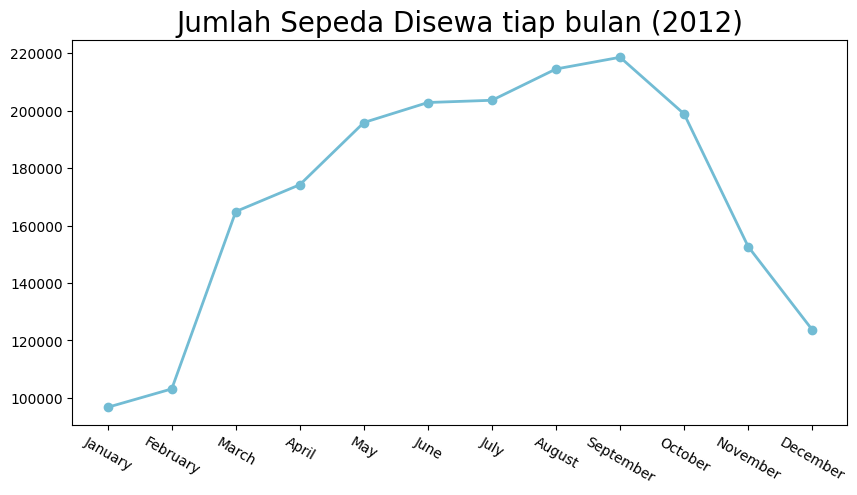

In [34]:
Y2012_df = day_df[day_df.yr=="2012"] #mengambil data tahun 2012

monthly_cnt_df = Y2012_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_cnt_df.index = monthly_cnt_df.index.strftime('%B') #mengubah format order date menjadi nama bulan

monthly_cnt_df = monthly_cnt_df.reset_index()
monthly_cnt_df.rename(columns={
    "cnt": "Jumlah Sepeda Disewa"
}, inplace=True)

plt.figure(figsize=(10, 5))

plt.plot(
    monthly_cnt_df["dteday"],
    monthly_cnt_df["Jumlah Sepeda Disewa"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Jumlah Sepeda Disewa tiap bulan (2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=-30)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Bagaimana pengaruh perbedaan musim terhadap jumlah sepeda yang disewa?

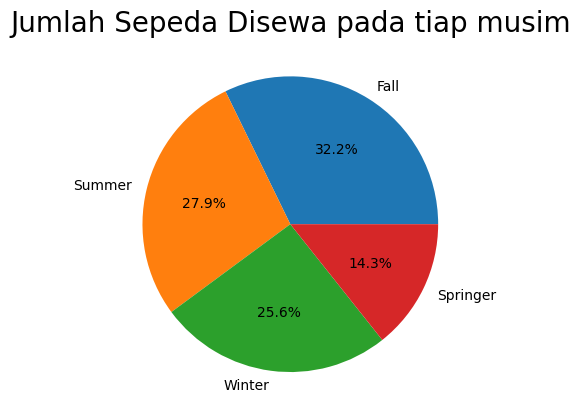

In [35]:
season_df=day_df.groupby(by="season").cnt.sum().sort_values(ascending=False) #mengelompokkan cnt berdasarkan musim

plt.pie(
    x=season_df.values,
    labels=["Fall","Summer","Winter","Springer"],
    autopct='%1.1f%%'
)
plt.title("Jumlah Sepeda Disewa pada tiap musim", loc="center", fontsize=20)
plt.show()

### Pertanyaan 3: Seperti apa hubungan temperatur udara dengan jumlah persewaan sepeda dalam satu hari?

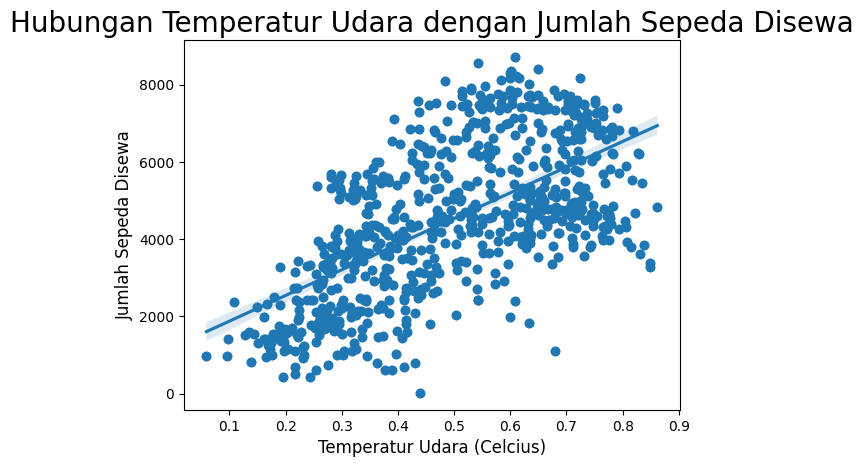

In [36]:
#membuat scatterplot antara temp dan cnt
plt.scatter(x=day_df["temp"], y=day_df["cnt"])
sns.regplot(x=day_df["temp"], y=day_df["cnt"])
plt.title("Hubungan Temperatur Udara dengan Jumlah Sepeda Disewa", loc="center", fontsize=20)
plt.ylabel("Jumlah Sepeda Disewa", size=12)
plt.xlabel("Temperatur Udara (Celcius)", size=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1


> Jika dilihat dari kedua grafik time-series antara performa jumlah sepeda disewa tahun 2011 dan tahun 2012, dapat disimpulkan bahwa setiap awal semester dalam satu tahun jumlah sepeda disewa cenderung naik secara signifikan dan mencapai puncak pada pertengahan tahun. Namun mulai terjadi penurunan ketika memasuki semester kedua, walaupun kondisi diakhir tahun masih lebih tinggi daripada kondisi di awal tahun.


- Conclution pertanyaan 2


> Jika dilihat dari pie chart peminat persewaan sepeda terbanyak ada pada musim fall dan summer dengan proporsi 32,2% dan 27,9%. Sedangkan pada musim winter dan springer peminat persewaan sepeda cenderung sedikit dengan proporsi 25,6% dan 14,3%. Hasil ini juga berhubungan dengan pertanyaan 1 dimana peminat persewaaan sepeda tinggi di musim fall dan summer yang merupakan musim-musim di pertengahan tahun.


- Conclution pertanyaan 3


> Berdasarkan grafik scatterplot antara variabel temperatur udara (Celcius) dan Jumlah sepeda disewa, terlihat bahwa kedua variabel berkorelasi positif mendekati nilai 1. Hal tersebut dapat diartikan bahwa tingginya suhu udara membuat peminat persewaaan sepeda tinggi, sebaliknya jika suhu udara rendah maka peminat persewaan sepeda juga rendah.

